## Distribution of (median imagette - median image)/median image  only for birds imagettes from Alex Anotation and the picture corresponding

In [39]:
#D'abord faire un histogramme tout court des birds par folder
#Puis hist par rapport med(birds)-med(images)/med(images)
liste_path="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/listes/pixels_normalized/"
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import ast

import pickle

In [40]:
images=pd.read_csv("/mnt/VegaSlowDataDisk/c3po/Images_aquises/imagettes.csv")
images.head()

,path,filename,width,height,classe,xmin,ymin,xmax,ymax,index,imagetteName
0,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0029.JPG,5200,3900,incertain,828,1592,875,1641,0,DSCF0029_incertain_0.JPG
1,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0029.JPG,5200,3900,ground,881,1587,928,1636,1,DSCF0029_ground_1.JPG
2,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0180.JPG,5200,3900,corneille,2842,2731,2876,2767,2,DSCF0180_corneille_2.JPG
3,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0180.JPG,5200,3900,corneille,2799,2731,2833,2767,3,DSCF0180_corneille_3.JPG
4,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0258.JPG,5200,3900,pigeon,3249,2638,3541,3286,4,DSCF0258_pigeon_4.JPG


In [41]:
   
fichierClasses= "/mnt/VegaSlowDataDisk/c3po/Images_aquises/Table_Labels_to_Class.csv" # overwritten by --classes myFile
frame=pd.read_csv(fichierClasses,index_col=False)

def to_reference_labels (df,class_colum,frame=frame):

    #flatten list in Labels_File
    cat=[]
    for i in range(len(frame["categories"]) ):
        cat.append( frame["categories"][i] )

    liste = [ast.literal_eval(item) for item in cat]

    # set nouvelle_classe to be the "unified" class name
    for j in range(len(frame["categories"])):
        #classesToReplace = frame["categories"][j].split(",")[0][2:-1]
        className = frame["categories"][j].split(",")[0][2:-1]
        #df["nouvelle_classe"]=df["classe"].replace(classesToReplace,className)
        df[class_colum]=df[class_colum].replace(liste[j],className)

    return df

images=to_reference_labels (images,"classe")
liste_to_keep=["corneille","faisan","pigeon","oiseau"]
images=images[images["classe"].isin(liste_to_keep)]  
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"

## Dossier 0

In [42]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_0']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_0/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)


with open(liste_path+"list0_bn.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    

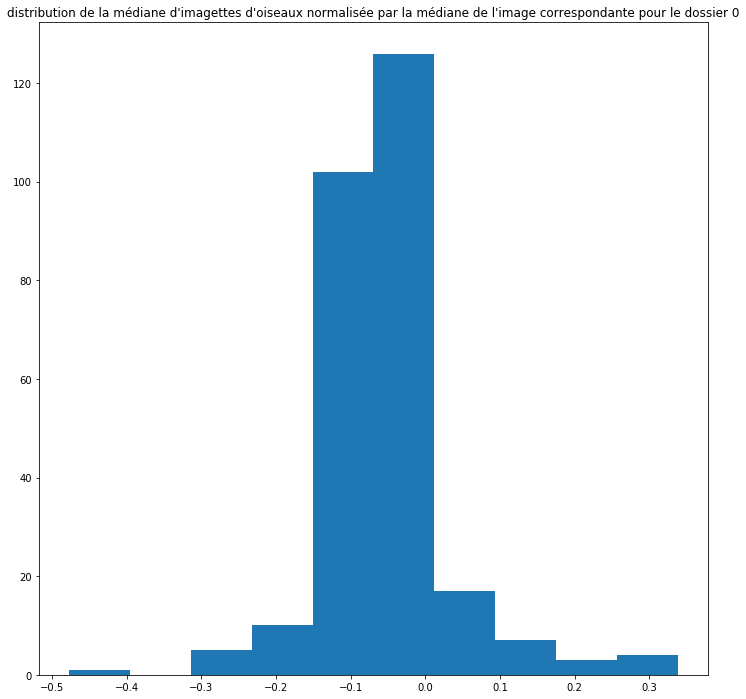

In [46]:
liste_path="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/listes/pixels_normalized/"

with open(liste_path+"list0_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_0 = pickle.load(fp)

plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 0")
plt.hist(birds_norm_0);

## Dossier 1

In [28]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_1']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_1/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)


with open("list1_bn.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    




/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars


70
65


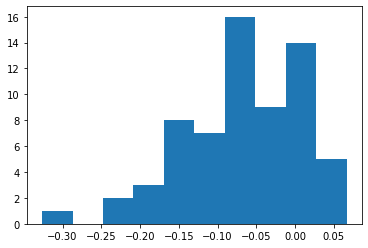

In [64]:
hist_filtre=[ i for i in birds_norm_liste if (i>-100  )]
plt.hist(hist_filtre)
#plt.hist(birds_norm_liste[550:555])
print(len(birds_norm_liste))
print(len(hist_filtre))

(array([ 2.,  1.,  3.,  4.,  2.,  5.,  8., 14., 19.,  6.]),
 array([0.58260869, 0.61880484, 0.65500098, 0.69119712, 0.72739327,
        0.76358941, 0.79978556, 0.8359817 , 0.87217784, 0.90837399,
        0.94457013]),
 <a list of 10 Patch objects>)

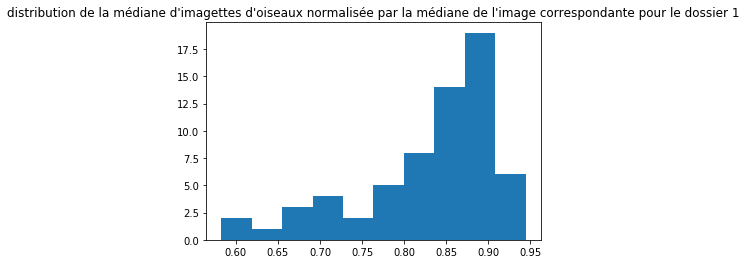

In [65]:


with open(liste_path+"list1_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_1 = pickle.load(fp)
    

hist_filtre_1=[ i for i in birds_norm_1 if (i>-0.5 and i>0.5)]

#plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 1")
plt.hist(hist_filtre_1)

In [ ]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_1']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_1/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)

"""
with open("list1_bn.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
"""  


plt.hist(birds_norm_liste)

/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars


## Dossier 2

In [61]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_2']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_2/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if ((i>200) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)


with open("list2_bn.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    

    
with open("list2_bn.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [53]:
with open(liste_path+"list2_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_2 = pickle.load(fp)
    

hist_filtre_2=[ i for i in birds_norm_2 if (i>-100  )]

plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 2")
plt.hist(hist_filtre_2);

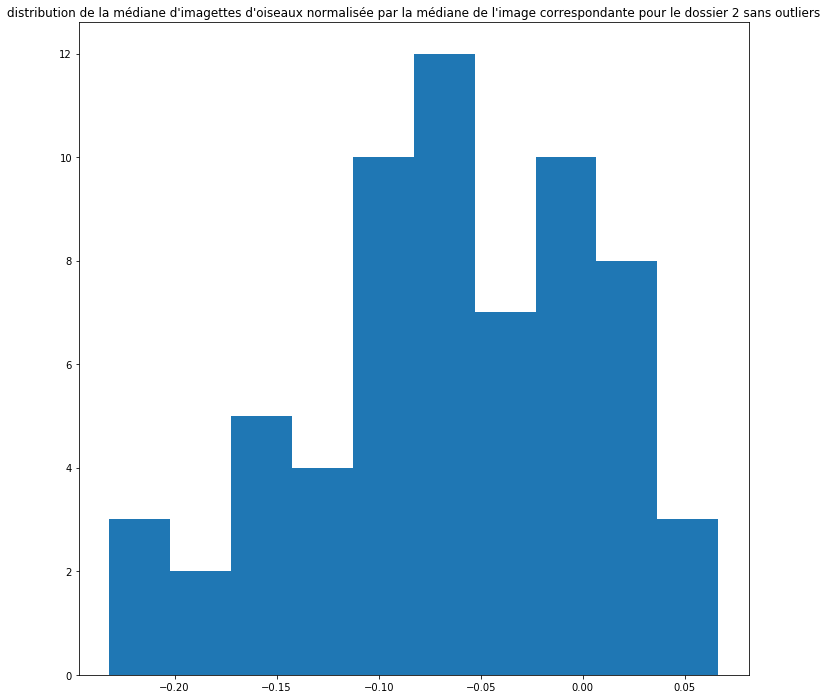

In [55]:
with open(liste_path+"list2_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_2 = pickle.load(fp)
    

hist_filtre_2=[ i for i in birds_norm_2 if (i>-0.3  and i<1)]

plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 2 sans outliers")
plt.hist(hist_filtre_2);

## Dossier 3

In [71]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_3']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_3/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)


with open("list3_bn.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list3_bn.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

plt.title("distribution des pixels des oiseaux normalisés par les pixels de l'image entière pour le dossier3 ")
plt.hist(b)

nombre d'imagettes total d'oiseaux 492
nombre d'imagettes restants après avoir enlevé les outliers 354


(array([36., 30., 51., 72., 68., 57., 20.,  7.,  8.,  5.]),
 array([-0.49999989, -0.40129241, -0.30258494, -0.20387747, -0.10516999,
        -0.00646252,  0.09224495,  0.19095242,  0.2896599 ,  0.38836737,
         0.48707484]),
 <a list of 10 Patch objects>)

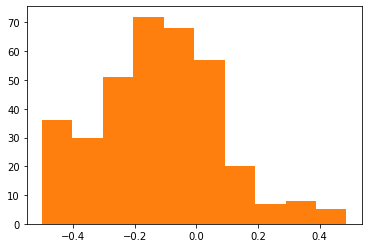

In [10]:

with open("../list3_bn.txt", "rb") as fp:   # Unpickling
    liste3 = pickle.load(fp)

hist_filtre=[ i for i in liste3 if (i>-0.5 and i<0.5 )]
plt.hist(hist_filtre)
print("nombre d'imagettes total d'oiseaux",len(liste3))
print("nombre d'imagettes restants après avoir enlevé les outliers",len(hist_filtre))
plt.hist(hist_filtre)

In [58]:
with open("../list3_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_3 = pickle.load(fp)
    

hist_filtre_3=[ i for i in birds_norm_liste if (i>-100  )]

plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 3")
plt.hist(hist_filtre_3)

(array([  1.,   0.,   5.,  10., 102., 126.,  17.,   7.,   3.,   4.]),
 array([-0.47733909, -0.39577378, -0.31420847, -0.23264315, -0.15107784,
        -0.06951252,  0.01205279,  0.0936181 ,  0.17518342,  0.25674873,
         0.33831405]),
 <a list of 10 Patch objects>)

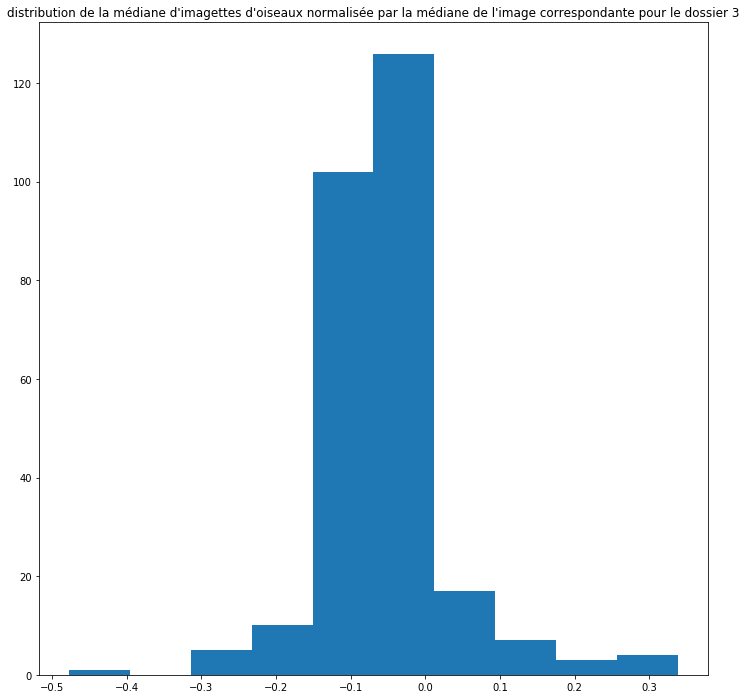

In [59]:
with open("../list3_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_3 = pickle.load(fp)
    

hist_filtre_3=[ i for i in birds_norm_liste if (i>-0.5 and i<0.5 )]

plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 3")
plt.hist(hist_filtre_3)

## Dossier 4

(array([  1.,   0.,   1.,   0.,   1.,   1.,  12., 118., 165.,  51.]),
 array([-4.83333371, -4.2578112 , -3.6822887 , -3.1067662 , -2.53124369,
        -1.95572119, -1.38019869, -0.80467618, -0.22915368,  0.34636882,
         0.92189133]),
 <a list of 10 Patch objects>)

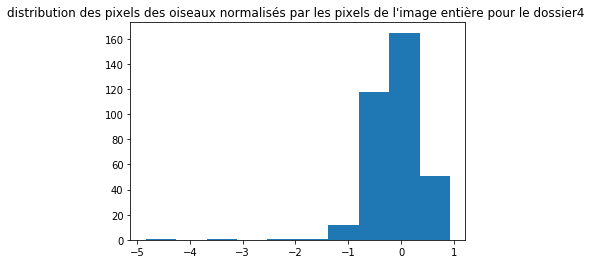

In [30]:
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
images_0=images[images["path"]=='./DonneesPI/timeLapsePhotos_Pi1_4']
liste_images_fold0=list(images_0["filename"].unique())
liste_images_fold0=liste_images_fold0
fold_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_4/"
imagettes_path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/Rec_images/"
birds_norm_liste=[]





for image_path in liste_images_fold0:
    
    path=fold_path+image_path
    #print(path)
    image_bgr=cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_rgb_reshape=(image_rgb.reshape(-1,3))

    color_image=[]


    for i in range(len(image_rgb_reshape)):
        pixel=image_rgb_reshape[i]
        red=pixel[0]
        green=pixel[1]
        blue=pixel[2]
        hsv=colorsys.rgb_to_hsv(red,green,blue)
        color=hsv[0]*360
        color_image.append(color)
    
    #Faire un filtre pour le ciel, éventuellement l'herbe
    color_filtre=[ i for i in color_image if (i<100 and (i>10) )]
    med_im_color=np.median(color_filtre)
    #print(med_im_color)
    
    imagettes_liste=images["imagetteName"][images["filename"]==image_path]
    imagettes_liste=list(imagettes_liste.unique())
    
    for imagette in imagettes_liste:
        color_imagettes_liste=[]
        #print(imagette)
    
    
    


        path=imagettes_path+imagette
        #print(path)
        image_bgr=cv2.imread(path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_rgb_reshape=(image_rgb.reshape(-1,3))




        for i in range(len(image_rgb_reshape)):
            pixel=image_rgb_reshape[i]
            red=pixel[0]
            green=pixel[1]
            blue=pixel[2]
            hsv=colorsys.rgb_to_hsv(red,green,blue)
            color_imagettes=hsv[0]*360
            color_imagettes_liste.append(color_imagettes)
            
        imagette_med=np.median(color_imagettes_liste)
        birds_norm=(imagette_med-med_im_color)/imagette_med
        #print("différence",birds_norm)
        birds_norm_liste.append(birds_norm)


with open("list4_bn.txt", "wb") as fp:   #Pickling
    pickle.dump(birds_norm_liste, fp)
    
    
with open("list4_bn.txt", "rb") as fp:   # Unpickling
    liste4 = pickle.load(fp)

plt.title("distribution des pixels des oiseaux normalisés par les pixels de l'image entière pour le dossier4 ")
plt.hist(liste4)

In [ ]:
with open("list4_bn.txt", "rb") as fp:   # Unpickling
    liste3 = pickle.load(fp)

hist_filtre=[ i for i in birds_norm_liste if (i>-0.3  and i<1)]
plt.hist(hist_filtre)
print("nombre d'imagettes total d'oiseaux",len(liste3))
print("nombre d'imagettes restants après avoir enlevé les outliers",len(hist_filtre))
plt.hist(hist_filtre)

(array([  1.,   0.,   5.,  10., 102., 126.,  17.,   7.,   3.,   4.]),
 array([-0.47733909, -0.39577378, -0.31420847, -0.23264315, -0.15107784,
        -0.06951252,  0.01205279,  0.0936181 ,  0.17518342,  0.25674873,
         0.33831405]),
 <a list of 10 Patch objects>)

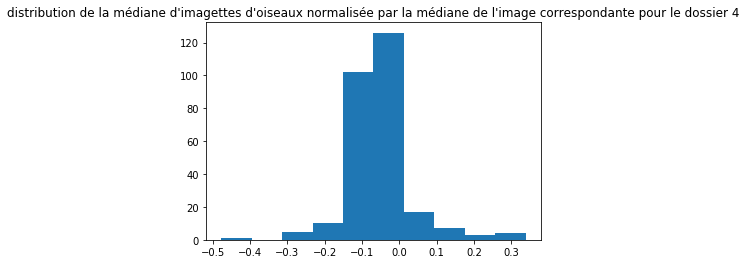

In [61]:
with open("list4_bn.txt", "rb") as fp:   # Unpickling
    birds_norm_4 = pickle.load(fp)
    

hist_filtre_4=[ i for i in birds_norm_liste if (i>-100  )]

#plt.figure(figsize=(12,12))
plt.title("distribution de la médiane d'imagettes d'oiseaux normalisée par la médiane de l'image correspondante pour le dossier 4")
plt.hist(hist_filtre_4)